# Feature Selection


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv("data/Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [130]:
df.drop(["day", "month", 'year'],axis=1,inplace=True)

In [131]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [132]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [133]:
df['Classes'] = np.where(df["Classes"].str.contains("not fire"), 0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [134]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [135]:
## Defining independent and dependent features
X = df.drop(["FWI"], axis=1)
Y = df['FWI']

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [137]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

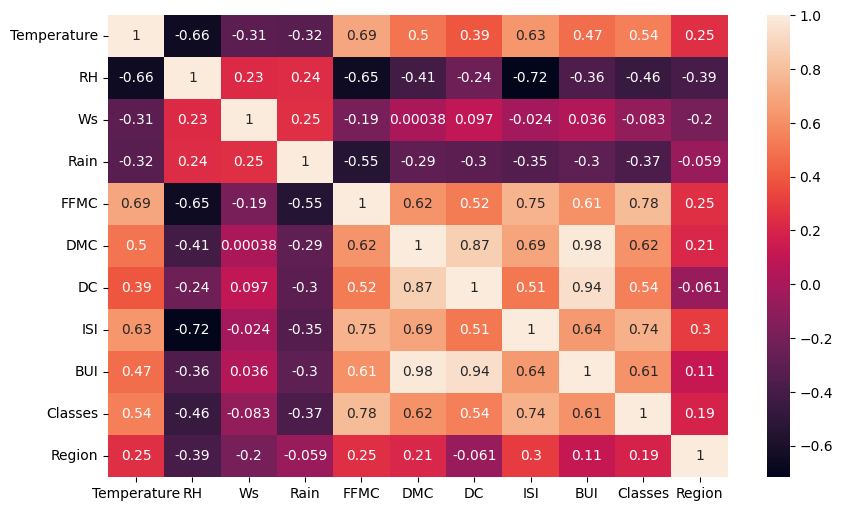

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), annot=True)

In [139]:
def correlation(dataset, threshold):
    corr_set = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_set.add(dataset.columns[i])
    return corr_set

In [140]:
corr_columns = correlation(X_train, 0.85)
corr_columns

{'BUI', 'DC'}

In [141]:
X_train.drop(corr_columns, axis = 1,inplace=True)
X_test.drop(corr_columns, axis = 1, inplace=True)

### Feature Scaling and standardization

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####  Box plot to view the changes due to standardization

Text(0.5, 1.0, 'X_train after scaling')

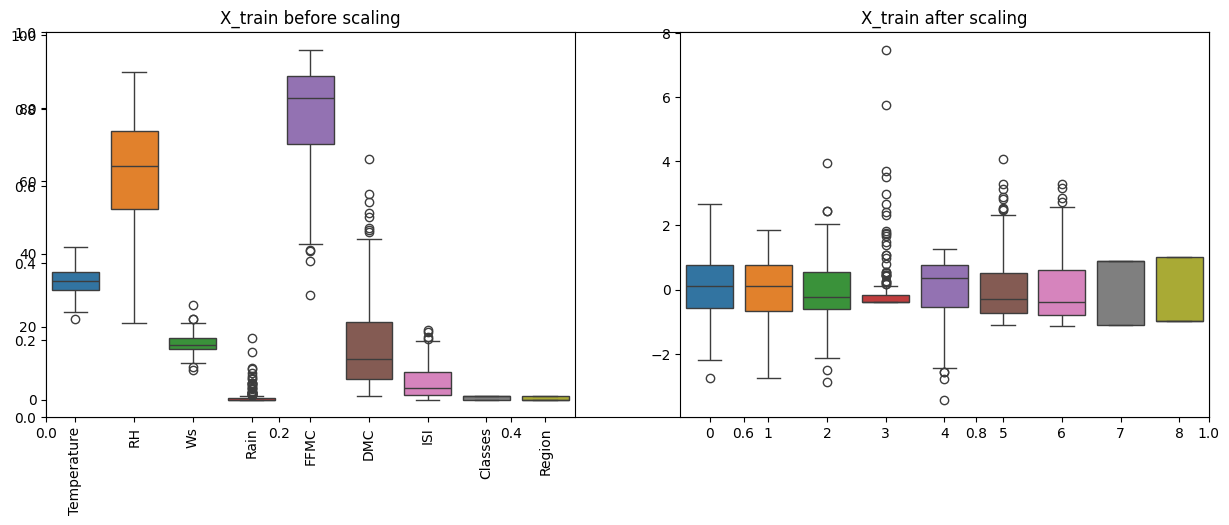

In [143]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.xticks(rotation=90)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train after scaling")

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled, Y_train)
pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  0.5468236465249978
r2:  0.9839977157632893


### Lasso Regression

In [145]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
LassoLearn = Lasso()
LassoLearn.fit(X_train_scaled, Y_train)
pred = LassoLearn.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  1.133175994914409
r2:  0.926474232680569


### Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, Y_train)
pred = ridge_regression.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  0.5642305340105715
r2:  0.9834070933284211


### Elastic Net

In [147]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, Y_train)
pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  1.8822353634896005
r2:  0.7814447243400926
